In [48]:
# importing necessary modules.
import pandas as pd
import config5 as cfg
from sqlalchemy import create_engine
import numpy as np
import matplotlib.pyplot as plt

In [49]:
# creating a connection to an aws rds postgres cloud database.
rds_connection_string = f'postgres:postgres@localhost:5432/optimal_portfolio'
engine = create_engine(f'postgres://{rds_connection_string}')

In [50]:
# checking out the table names in the database.
engine.table_names()

['sandp']

In [51]:
# checking out the SandP_500 table.
sandp = pd.read_sql_query('SELECT * FROM sandp', con=engine)
sandp.head()

,symbol,name,price_to_bookvalue,price_to_book,price_to_sales,price_to_earnings,receivables_turnover,price_to_free_cash_flow,price_to_operating_cash_flow,enterprise_value_multiple,...,inventory_growth,asset_growth,book_value_per_share_growth,debt_growth,randd_expense_growth,sganda_expense_growth,percent_return_on_investment,industry,sector,above_below_sandp_return
0,A,"Agilent Technologies, Inc.",2.55170,5.17165,1.48130,6.30885,7.0014,18.1807,13.57995,16.746223,...,0.0758,0.18005,0.15185,0.31885,-0.0674,0.01880,215.407785,Medical Diagnostics & Research,Healthcare,0
1,AAL,"American Airlines Group, Inc.",-99.00000,-99.00000,0.11565,-99.00000,27.3348,-99.0000,2.20925,61.812855,...,0.0637,-0.00170,-0.06235,0.00975,-99.0000,0.01435,492.976589,Airlines,Industrials,1
2,AAP,"Advance Auto Parts, Inc.",2.95660,3.10380,0.70600,14.16840,57.0461,7.4185,5.46130,0.499984,...,0.0054,0.03670,0.19520,-0.57150,-99.0000,0.10360,158.290852,Retail - Apparel & Specialty,Consumer Cyclical,0
3,AAPL,"Apple, Inc.",5.42765,4.62715,3.98235,19.54495,10.0906,17.3279,15.35960,0.493341,...,0.6019,0.44800,0.44245,-99.00000,0.2694,0.21645,641.441749,Computer Hardware,Technology,1
4,ABBV,"AbbVie, Inc.",16.46870,-99.00000,3.01900,10.48360,-99.0000,9.2123,8.74540,0.001609,...,-99.0000,-99.00000,-99.00000,-99.00000,0.4613,0.14080,127.493713,Drug Manufacturers,Healthcare,0


In [52]:
# converting industry columns into 1's and 0's.
industry = pd.get_dummies(sandp['industry'])

In [53]:
# converting sector columns into 1's and 0's.
sector = pd.get_dummies(sandp['sector'])

In [54]:
# bringing everything together.
sandp = pd.concat([sandp, industry, sector], axis=1)

In [55]:
# dropping industry and sector columns.
sandp.drop(['industry', 'sector'], axis=1, inplace=True)

In [56]:
# dropping unnecessary columns.
sandp.drop(['symbol', 'name', 'percent_return_on_investment'], axis=1, inplace=True)

In [57]:
X = sandp[['net_income_growth','short_term_coverage_ratio','eps_diluted_growth', 'gross_profit_margin', 'price_to_book', 'price_to_sales', 'price_to_free_cash_flow', 'asset_growth', 'Airlines',
'Computer Hardware','Drug Manufacturers', 'Medical Devices','Application Software', 'Semiconductors','Consumer Packaged Goods', 
'Business Services', 'Credit Services','Utilities - Regulated', 'Insurance - Life', 'REITs','Brokers & Exchanges','Biotechnology',
'Asset Management', 'Online Media','Oil & Gas - E&P','Autos', 'Banks', 'Travel & Leisure', 'Entertainment','Agriculture',
'Transportation & Logistics','Oil & Gas - Integrated','Industrial Distribution','Metals & Mining','Oil & Gas - Services',
'Personal Services','Engineering & Construction', 'Oil & Gas - Midstream','Beverages - Non-Alcoholic', 'Truck Manufacturing', 
'Employment Services', 'Forest Products']]
target = sandp['above_below_sandp_return']

In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, target_train, target_test = train_test_split(X, target, random_state=1, stratify=target)

In [59]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data

X_scaler = StandardScaler().fit(X_train)

In [60]:
 # Transform the training and testing data using the X_scaler and y_scaler models
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

k: 1, Train/Test Score: 1.000/0.692
k: 3, Train/Test Score: 0.838/0.718
k: 5, Train/Test Score: 0.764/0.718
k: 7, Train/Test Score: 0.729/0.692
k: 9, Train/Test Score: 0.744/0.709
k: 11, Train/Test Score: 0.729/0.692
k: 13, Train/Test Score: 0.735/0.709
k: 15, Train/Test Score: 0.726/0.684
k: 17, Train/Test Score: 0.721/0.650
k: 19, Train/Test Score: 0.709/0.650


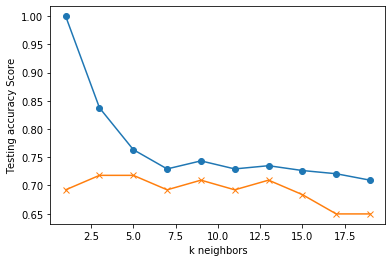

In [61]:
from sklearn.neighbors import KNeighborsClassifier
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, target_train)
    train_score = knn.score(X_train_scaled, target_train)
    test_score = knn.score(X_test_scaled, target_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [62]:
# Note that k: 9 provides the best accuracy where the classifier starts to stablize
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train_scaled, target_train)
print('k=13 Test Acc: %.3f' % knn.score(X_test_scaled, target_test))

k=13 Test Acc: 0.709


In [63]:
target_test.value_counts()

0    75
1    42
Name: above_below_sandp_return, dtype: int64

In [64]:
target.mean()

0.35683760683760685

In [65]:
predicted_class = knn.predict(X)

In [66]:
predicted = predicted_class.tolist()

In [67]:
# checking out the SandP_500 table.
sandp = pd.read_sql_query('SELECT * FROM sandp', con=engine)
sandp.head()

,symbol,name,price_to_bookvalue,price_to_book,price_to_sales,price_to_earnings,receivables_turnover,price_to_free_cash_flow,price_to_operating_cash_flow,enterprise_value_multiple,...,inventory_growth,asset_growth,book_value_per_share_growth,debt_growth,randd_expense_growth,sganda_expense_growth,percent_return_on_investment,industry,sector,above_below_sandp_return
0,A,"Agilent Technologies, Inc.",2.55170,5.17165,1.48130,6.30885,7.0014,18.1807,13.57995,16.746223,...,0.0758,0.18005,0.15185,0.31885,-0.0674,0.01880,215.407785,Medical Diagnostics & Research,Healthcare,0
1,AAL,"American Airlines Group, Inc.",-99.00000,-99.00000,0.11565,-99.00000,27.3348,-99.0000,2.20925,61.812855,...,0.0637,-0.00170,-0.06235,0.00975,-99.0000,0.01435,492.976589,Airlines,Industrials,1
2,AAP,"Advance Auto Parts, Inc.",2.95660,3.10380,0.70600,14.16840,57.0461,7.4185,5.46130,0.499984,...,0.0054,0.03670,0.19520,-0.57150,-99.0000,0.10360,158.290852,Retail - Apparel & Specialty,Consumer Cyclical,0
3,AAPL,"Apple, Inc.",5.42765,4.62715,3.98235,19.54495,10.0906,17.3279,15.35960,0.493341,...,0.6019,0.44800,0.44245,-99.00000,0.2694,0.21645,641.441749,Computer Hardware,Technology,1
4,ABBV,"AbbVie, Inc.",16.46870,-99.00000,3.01900,10.48360,-99.0000,9.2123,8.74540,0.001609,...,-99.0000,-99.00000,-99.00000,-99.00000,0.4613,0.14080,127.493713,Drug Manufacturers,Healthcare,0


In [68]:
sandp = sandp[['name', 'percent_return_on_investment', 'above_below_sandp_return']]

In [69]:
sandp.head()

,name,percent_return_on_investment,above_below_sandp_return
0,"Agilent Technologies, Inc.",215.407785,0
1,"American Airlines Group, Inc.",492.976589,1
2,"Advance Auto Parts, Inc.",158.290852,0
3,"Apple, Inc.",641.441749,1
4,"AbbVie, Inc.",127.493713,0


In [70]:
sandp['predictions'] = predicted

In [71]:
sandp.head()

,name,percent_return_on_investment,above_below_sandp_return,predictions
0,"Agilent Technologies, Inc.",215.407785,0,1
1,"American Airlines Group, Inc.",492.976589,1,0
2,"Advance Auto Parts, Inc.",158.290852,0,1
3,"Apple, Inc.",641.441749,1,0
4,"AbbVie, Inc.",127.493713,0,0


In [72]:
predicted_positives = []
for (x,y) in zip(sandp['predictions'],sandp['percent_return_on_investment']):
    if x == 1:
        predicted_positives.append(y)

In [73]:
predicted = pd.DataFrame(predicted_positives)

In [74]:
len(predicted)

86

In [75]:
for x in predicted[0]:
    if x < 0:
        print(x)

-72.3336853220697
-18.363772829622206
-29.984317825405128


In [76]:
gain = predicted.sum()

In [77]:
(gain - len(predicted))/len(predicted)

0    287.323926
dtype: float64

In [78]:
import joblib
filename = 'finalized_model.sav'
joblib.dump(knn, filename)

['finalized_model.sav']

In [79]:
loaded_model = joblib.load(filename)
result = loaded_model.score(X_test, target_test)
print(result)

0.6239316239316239
